In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\Bingxin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn import metrics

import statsmodels.api as sm

logistic regression : <br>
\begin{equation*}
log\left(\frac{p}{1-p}\right) = \eta = x^T\beta
\end{equation*}
a logistic function of the probability is:<br>
\begin{equation*}
p = \frac{1}{1+\mathrm{e}^{-\eta}}
\end{equation*}


In [8]:
# plot the logistic function
def logistic(eta):
    return 1/(1+math.exp(-eta))

# set eta from -6 to 6 (500 elements, linearly spaced)
eta = np.linspace(-6,6,500)

# set up y values (using list comprehension)
p = np.array([logistic(t) for t in eta])

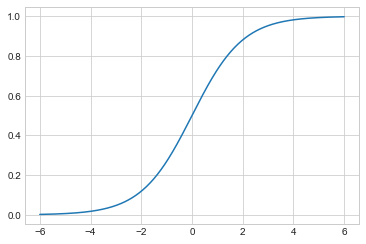

In [10]:
# plot
plt.plot(eta,p)

### Data Set analysis


data source check this : http://www.statsmodels.org/stable/datasets/generated/fair.html
<br>
Goal of the analysis is to classify a woman into having had an extramarital affair nor not, given information on her.

Number of observations: 6366 Number of variables: 9 Variable name definitions: <br>

rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good <br>
age             : Age<br>
yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation. <br>
children        : No. children <br>
religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly<br>
educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree <br>
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree <br>
occupation_husb : Husband's occupation. Same as occupation.<br>
affairs         : measure of time spent in extramarital affairs

In [3]:
# load Statsmodels datasets into Pandas DataFrame
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [13]:
# create a column 1/0 for if having had an affair


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [4]:
# safe to do this when no null values
df['Had_Affair'] = 0
df['Had_Affair'].loc[df['affairs']>0] = 1

C:\Users\Bingxin\Anaconda2\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


alternative way is to do apply method on dataframe
```python
def affair_check(x):
    if x <> = 0
        return 1
    if x ==0 
        return 0

df['Had_Affair'] = df['affairs'].apply(affair_check,axis = 1)
```

In [18]:
# create a groupby object and see group means in other columns
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


It seems that those who have had an extramarrital affair are those who are older, married longer, with more children, less religious, less educated. However the numerical means of these featuers are very close between the two groups

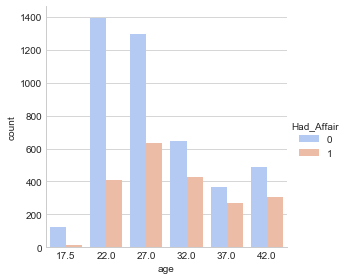

In [28]:
sns.factorplot(x='age',data=df,hue = 'Had_Affair',kind = 'count',palette='coolwarm')

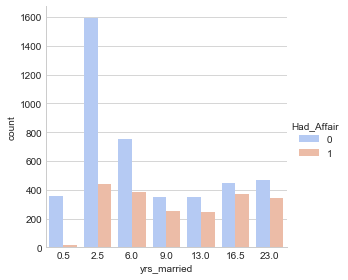

In [30]:
sns.factorplot(x='yrs_married',data=df,hue = 'Had_Affair',kind = 'count',palette='coolwarm')

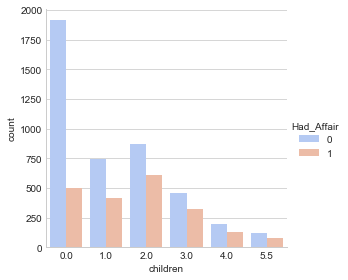

In [31]:
sns.factorplot(x='children',data=df,hue = 'Had_Affair',kind = 'count',palette='coolwarm')

The frequency of having an extramarital affairs increases in  groups with more children

### Data Preparation

Columns occupation and husband's occupation are unordered categorical variables. Create dummy variables for them

In [5]:
# pandas have built-in method to do this
occup_dummies = pd.get_dummies(df['occupation'])
husb_occup_dummies = pd.get_dummies(df['occupation_husb'])

In [6]:
# default column names will be the original values
occup_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
husb_occup_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']


In [7]:
# new X dataframe
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis = 1)
X=pd.concat([X,occup_dummies,husb_occup_dummies],axis = 1)

In [36]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


To avoid multicollinearity, need to drop occ1 and hocc1, actually one of the dummies for each categorical variables occupations and husband occupations.

In [8]:
X.drop('occ1',axis = 1, inplace = True)
X.drop('hocc1',axis=1, inplace = True)
X.drop('affairs',axis=1, inplace = True)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 16 columns):
rate_marriage    6366 non-null float64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null float64
educ             6366 non-null float64
occ2             6366 non-null uint8
occ3             6366 non-null uint8
occ4             6366 non-null uint8
occ5             6366 non-null uint8
occ6             6366 non-null uint8
hocc2            6366 non-null uint8
hocc3            6366 non-null uint8
hocc4            6366 non-null uint8
hocc5            6366 non-null uint8
hocc6            6366 non-null uint8
dtypes: float64(6), uint8(10)
memory usage: 360.6 KB


In [9]:
Y= df.Had_Affair

In order to use Y in scikit learn, need to set it as a 1-D array. 

In [10]:
Y= np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Logistic regression with SciKit Learn

In [43]:
# create a logistic regression object
log_model = LogisticRegression()

# fit the model
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# check the model accuracy
log_model.score(X,Y)

0.7260446120012567

This means about 73% of the observed outcome yes/no are accurately classified by the fitted model.

In [45]:
Y.mean()

0.3224945020420987

In the sample, the sample average of Y is 32%, meaning 32% of the women reported having had an affair. This is a relatively low percent. So, if we guess 0 for all women, our guess would be right for 1-32% = 68% of the women in the sample. Our logistic model has an accuracy rate of 73%, which is not better by a lot.
<br><br>
If we simply assign 0 or 1 by the probability of the 32%, what will be our accuracy rate in this classification task?

In [78]:
# make the dataframe for showing the coefficients.
coeff_df= DataFrame(X.columns)
coeff_df.columns = ['Features']

# log_model.coef is of shape(1,n_features)
coeff_df['Est Coeff'] = np.transpose(log_model.coef_)

In [79]:
coeff_df

,Features,Est Coeff
0,rate_marriage,-0.697739
1,age,-0.056329
2,yrs_married,0.103853
3,children,0.018107
4,religious,-0.367990
5,educ,0.009033
6,occ2,0.293794
7,occ3,0.604550
8,occ4,0.341839
9,occ5,0.938971


Since the model is for the probability of having an affair, so positive coefficient means an increased odds of having an affair when the feature increases. <br>
Consistent with our visualization, the longer one is married, the more children one has, the more likely the affair. Also if one has a higher rating for her marriage, the less likley she will have an affair. But contrary to our expectation, age has a positive coefficient.

Also all the coefficients before occupations are postive, which means compared to the baseline of being a student, women of other occupations are more likely to have an affair, given all else are equal. 

### Testing and training data sets

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [12]:
log_model2 = LogisticRegression()

In [13]:
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
class_pred = log_model2.predict(X_test)

In [15]:
# now we check the accuracy rate of the predicted classification
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(Y_test,class_pred, normalize = True)

0.7374371859296482

This means the fitted model when applied to the testing dataset, 73.7% of the Y is correctly classified.